In [2]:
filePos = "./data/Do_1.wav"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import IPython.display as ipd
from scipy.signal import find_peaks
from pydub import AudioSegment
from scipy.fftpack import ifft
from scipy import signal


c:\programdata\anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
audio = AudioSegment.from_file(filePos)

In [5]:
[fs, wave] = wavfile.read(filePos)
wave = wave[:, 0]

In [6]:
wave.dtype
wave = wave / 2**15

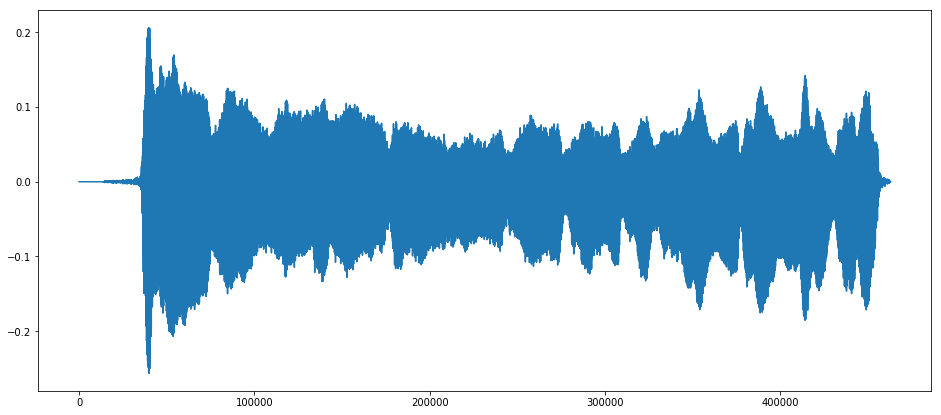

In [7]:
plt.figure(figsize=(16, 7))
plt.plot(wave)
plt.show()

ipd.Audio(wave, rate=fs)

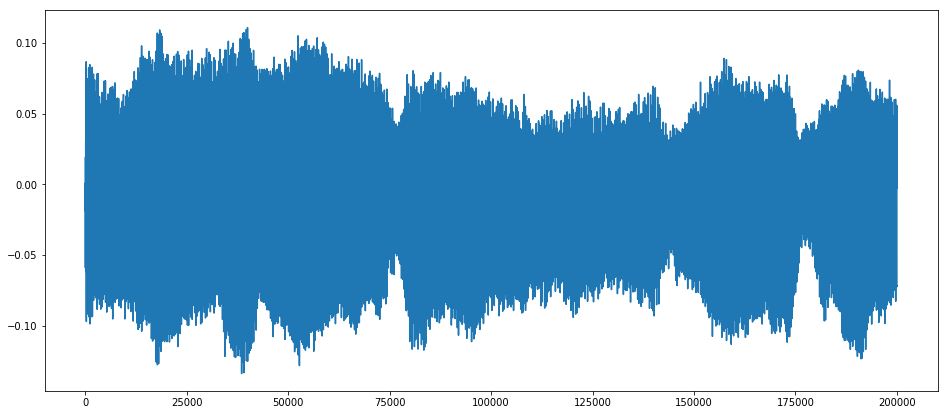

In [8]:
plt.figure(figsize=(16, 7))
y = wave[100000:300000]
plt.plot(y)
plt.show()

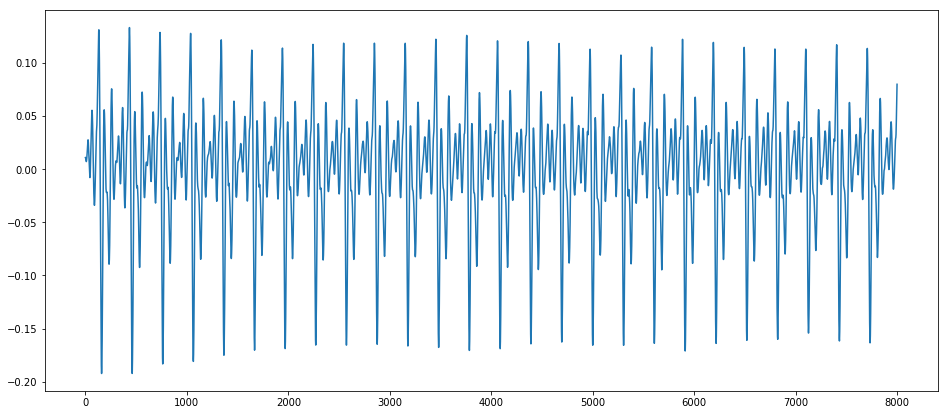

In [9]:
plt.figure(figsize=(16, 7))
start = 60000;
wavLen = 8000;
plt.plot(wave[start:start + wavLen])
plt.show()

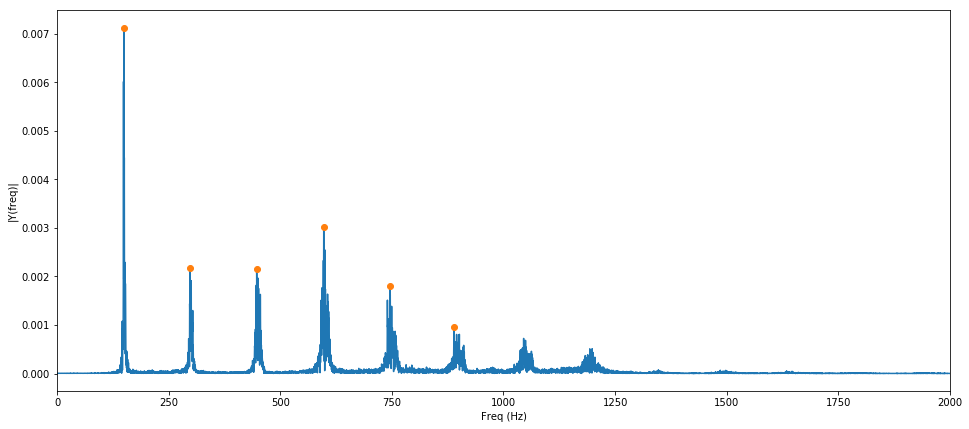

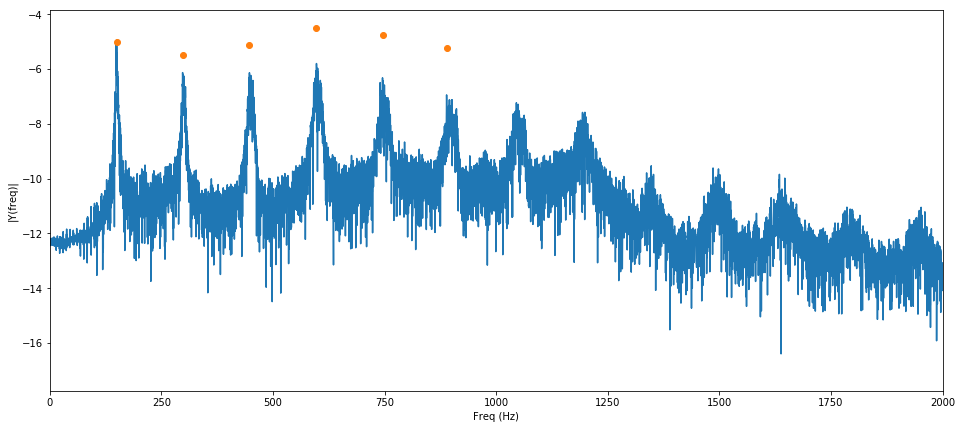

In [67]:
dt = 1.0/fs
time = np.arange(0, len(y)/fs, dt)

n = len(y) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]
Y = np.fft.fft(y)/n
Y = Y[range(np.int(n/2))]

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])

x, _ = find_peaks(abs(Y), distance=100, height=0.0009)
x = x[x < 8000]

plt.plot(freq[x], abs(Y)[x], 'o')
plt.show()

plt.figure(figsize=(16, 7))
plt.plot(freq, np.log(abs(Y))) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])
plt.plot(freq[x], np.log(abs(Y2)[x]), 'o')
plt.show()

In [106]:
np.array([65, 105, 225])/255

array([0.25490196, 0.41176471, 0.88235294])

In [111]:
maxY = max(abs(Y))
color = [np.array([0.25, 0.4, 0.9, y/maxY]) for y in abs(Y)]

In [116]:
fs

44100

In [195]:
f, t, Zxx = signal.stft(y, fs, nperseg=4410, noverlap=4410/2)

(0, 2000)

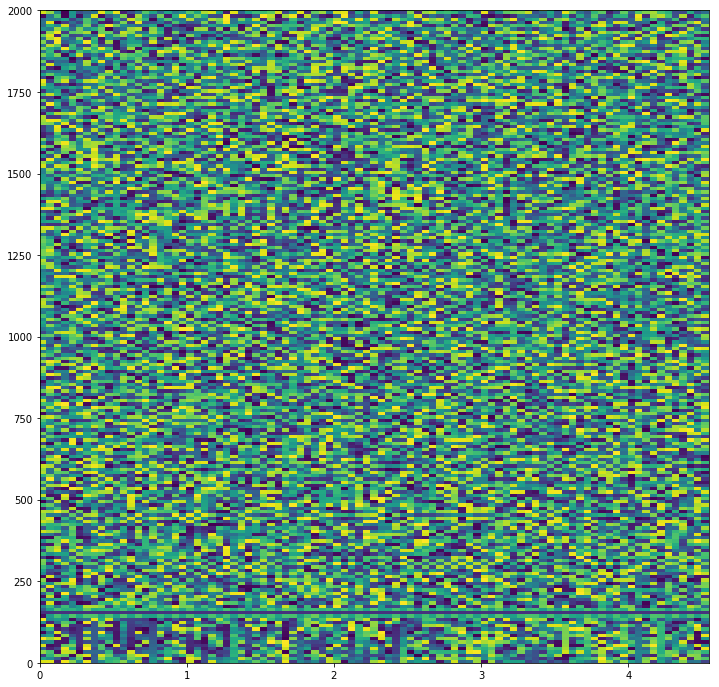

In [200]:
plt.figure(figsize=(12, 12))
angZ = np.angle(Zxx)
for i in range(Zxx.shape[1]):
    idx = np.argmax(abs(Zxx)[:, i])
    idx = 15
    angZ[:, i] = (angZ[:, i] - angZ[idx, i] + 2 * np.pi) % 2 * np.pi
    
plt.pcolormesh(t, f, angZ)
plt.ylim([0, 2000])

In [190]:
angZ.shape

(2206, 92)

In [191]:
Zxx.shape[0]

2206

(0, 2000)

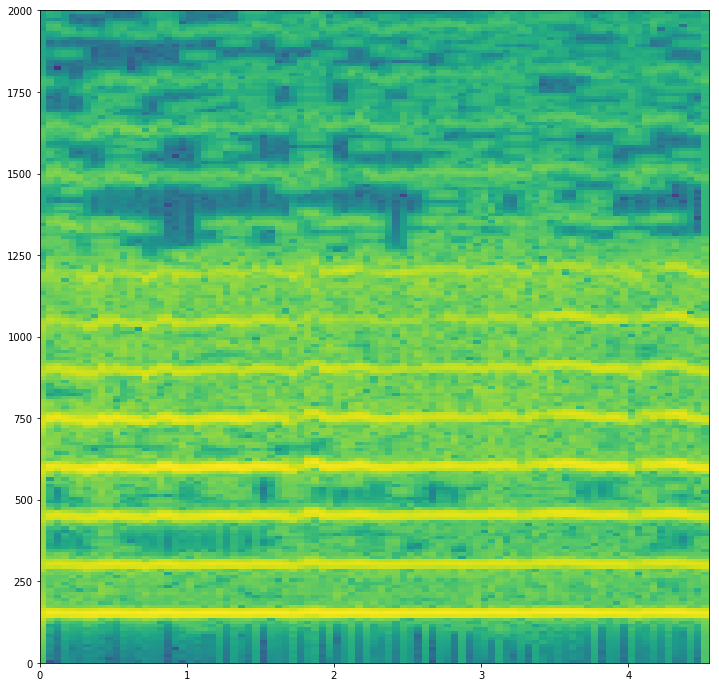

In [135]:
plt.figure(figsize=(12, 12))
plt.pcolormesh(t, f, np.log10(np.abs(Zxx)))
plt.ylim([0, 2000])

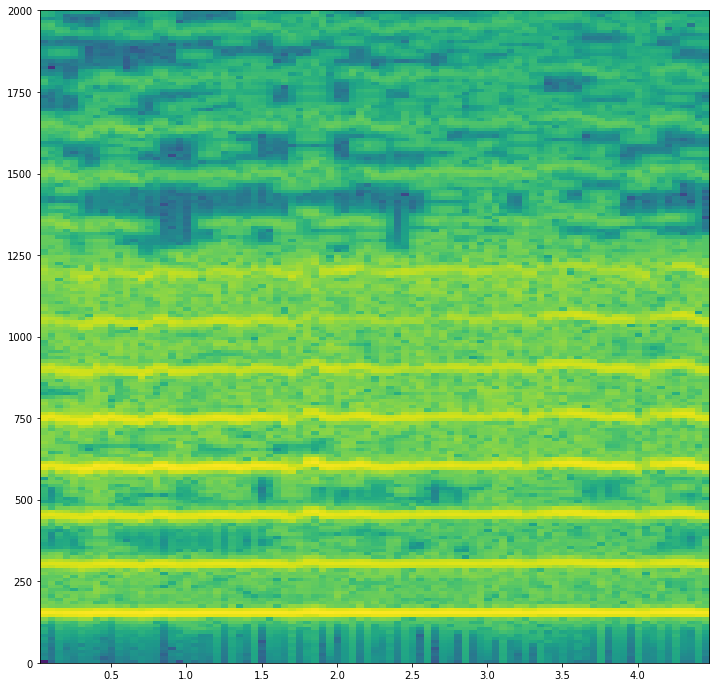

In [124]:
plt.figure(figsize=(12, 12))
Pxx, freqs, bins, im = plt.specgram(y, NFFT=4410, noverlap=4410/2, Fs=fs)
plt.ylim([0, 2000])
plt.show()

In [157]:
(abs(Y)) < 0.0005

array([ True,  True,  True, ...,  True,  True,  True])

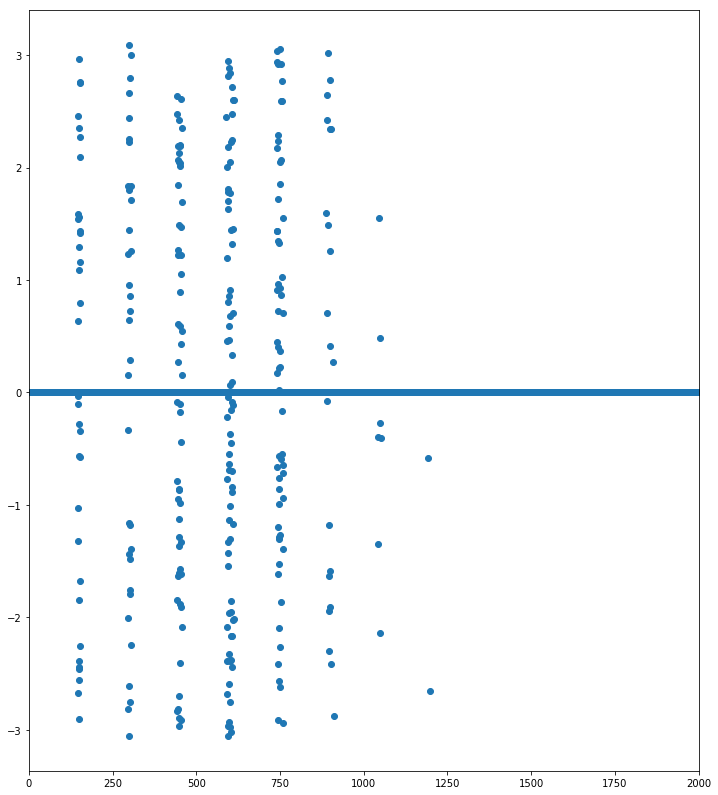

In [163]:
plt.figure(figsize=(12, 14))
Z = np.angle(Y)
Z[abs(Y) < 0.0005] = 0
plt.scatter(freq, Z)
plt.xlim(0, 2000)
plt.show()

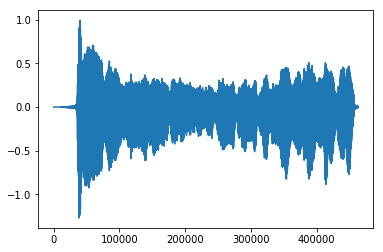

In [60]:
waveDif = np.diff(wave) * fs / 1000
plt.plot(waveDif)
ipd.Audio(waveDif, rate=fs)

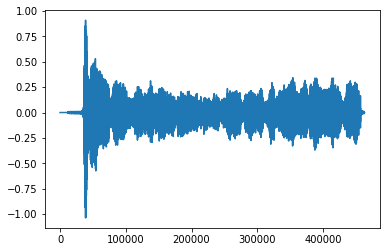

In [61]:
waveDif2 = np.diff(waveDif) * fs / 20000 * 1.5
plt.plot(waveDif2)
ipd.Audio(waveDif2, rate=fs)

In [10]:
yDif = np.diff(y) * fs / 1000
yDif2 = np.diff(yDif) * fs / 4000

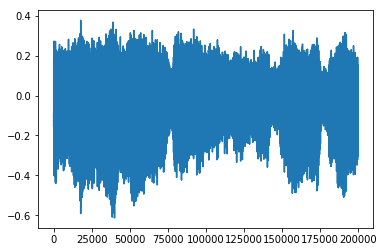

In [11]:
plt.plot(yDif)

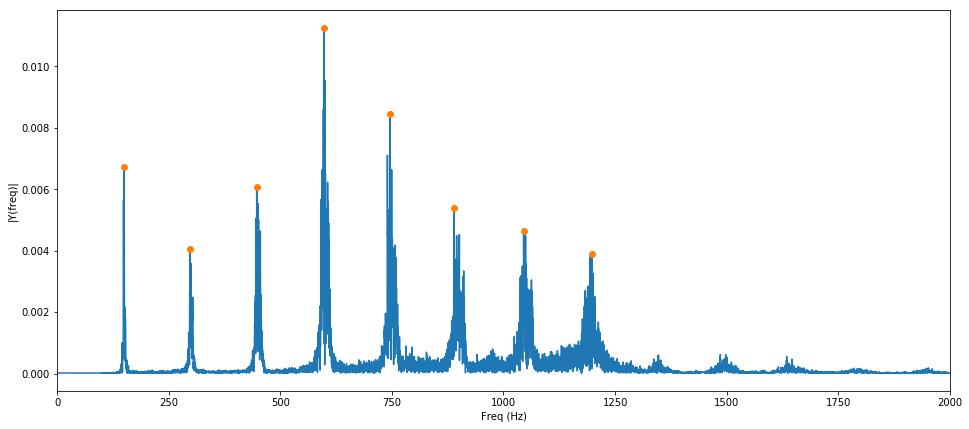

In [51]:
dt = 1.0/fs
time = np.arange(0, len(yDif)/fs, dt)

n = len(yDif) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]

Y2 = np.fft.fft(yDif)/n
Y2 = Y2[range(np.int(n/2))]

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y2)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])

x, _ = find_peaks(abs(Y2), distance=400, height=0.002)
x = x[x < 8000]

plt.plot(freq[x], abs(Y2)[x], 'o')
plt.show()

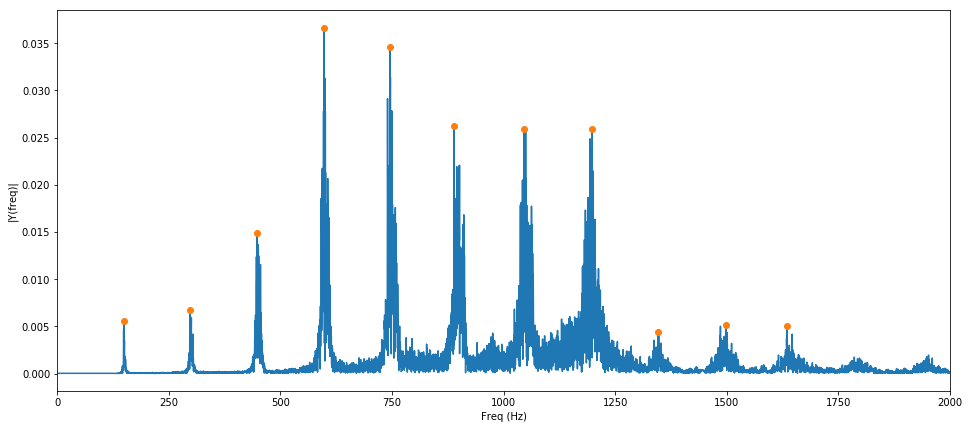

In [49]:
dt = 1.0/fs
time = np.arange(0, len(yDif2)/fs, dt)

n = len(yDif2) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]
Y3 = np.fft.fft(yDif2)/n
Y3 = Y3[range(np.int(n/2))]

Y3 = Y3 * 3.5

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y3)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])

x, _ = find_peaks(abs(Y3), distance=400, height=0.002)
x = x[x < 8000]

plt.plot(freq[x], abs(Y3)[x], 'o')
plt.show()

In [52]:
harmonic = freq[x]
harmonic

array([ 149.7202486 ,  297.45598728,  447.17623588,  597.33748669,
        745.29372647,  888.8399442 , 1045.17522588, 1198.64399322])

In [53]:
wavShapeLen = int(1/harmonic[0] * fs)
print(wavShapeLen)

294


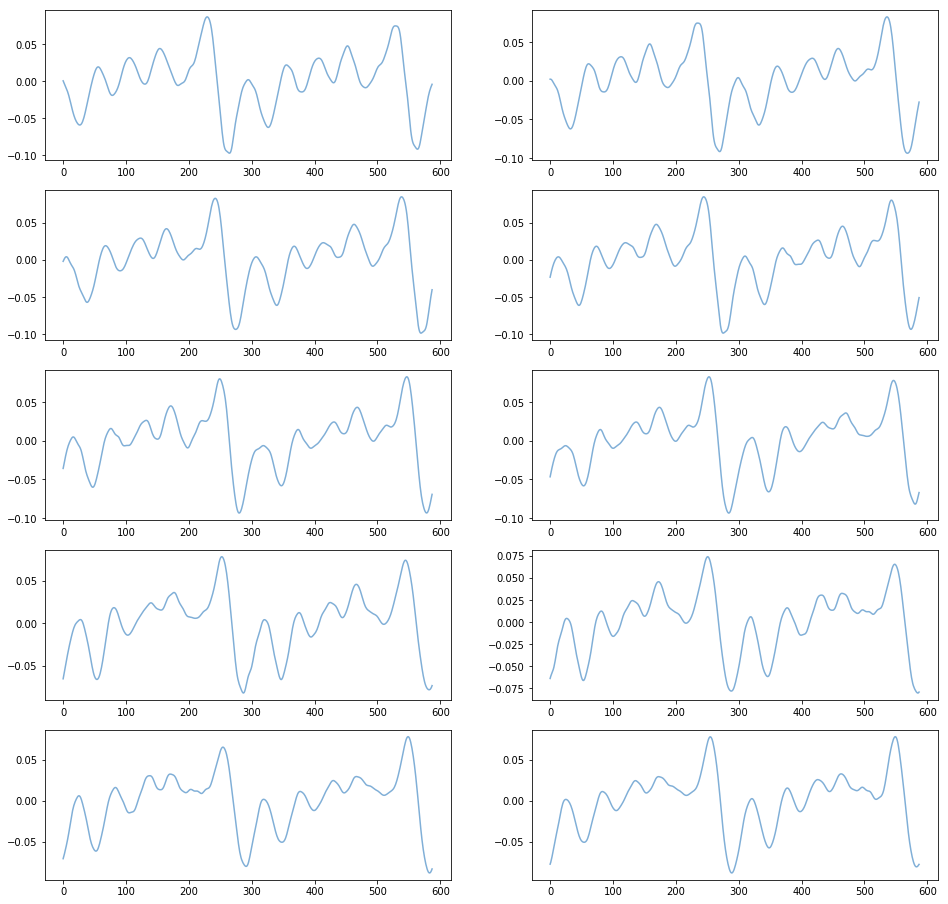

In [166]:
fig = plt.figure(figsize=(16, 16))
detSig = 0
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    sig = y[i*wavShapeLen:(i+2)*wavShapeLen]
    plt.plot(sig, color=(3/255, 96/255, 176/255), alpha=0.5)
    if i == 0:
        detSig = sig
        

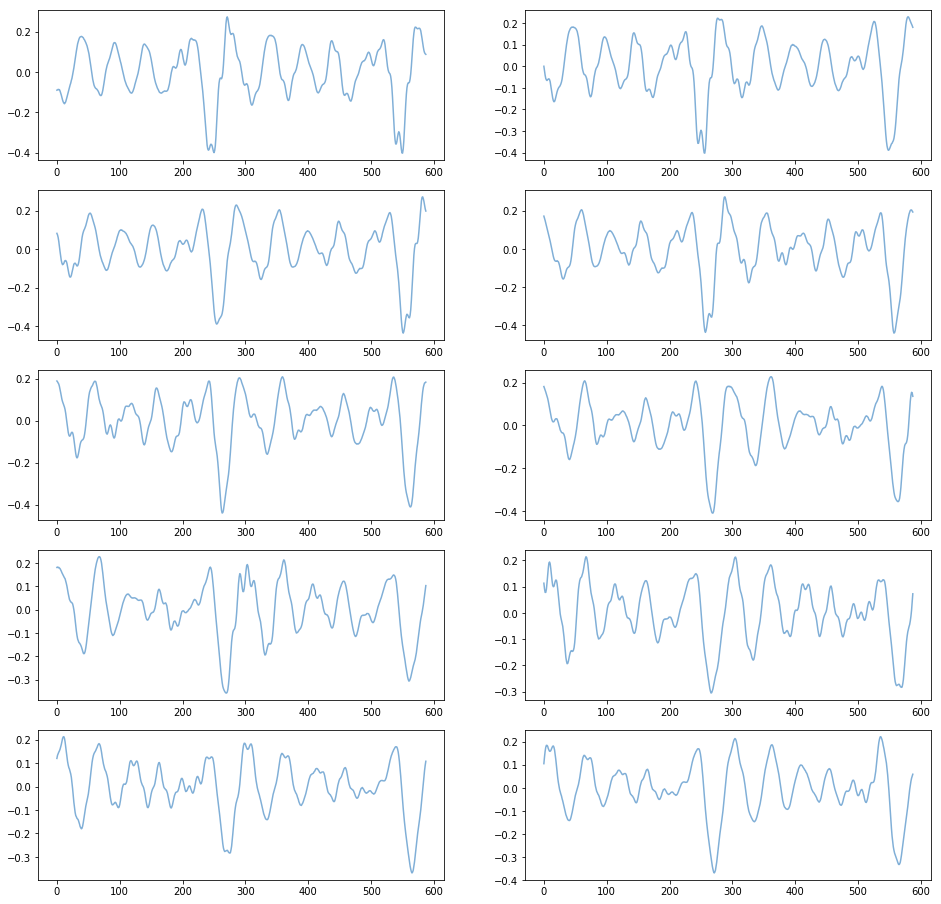

In [58]:
fig = plt.figure(figsize=(16, 16))
detSig = 0
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    sig = yDif[i*wavShapeLen:(i+2)*wavShapeLen]
    plt.plot(sig, color=(3/255, 96/255, 176/255), alpha=0.5)
        

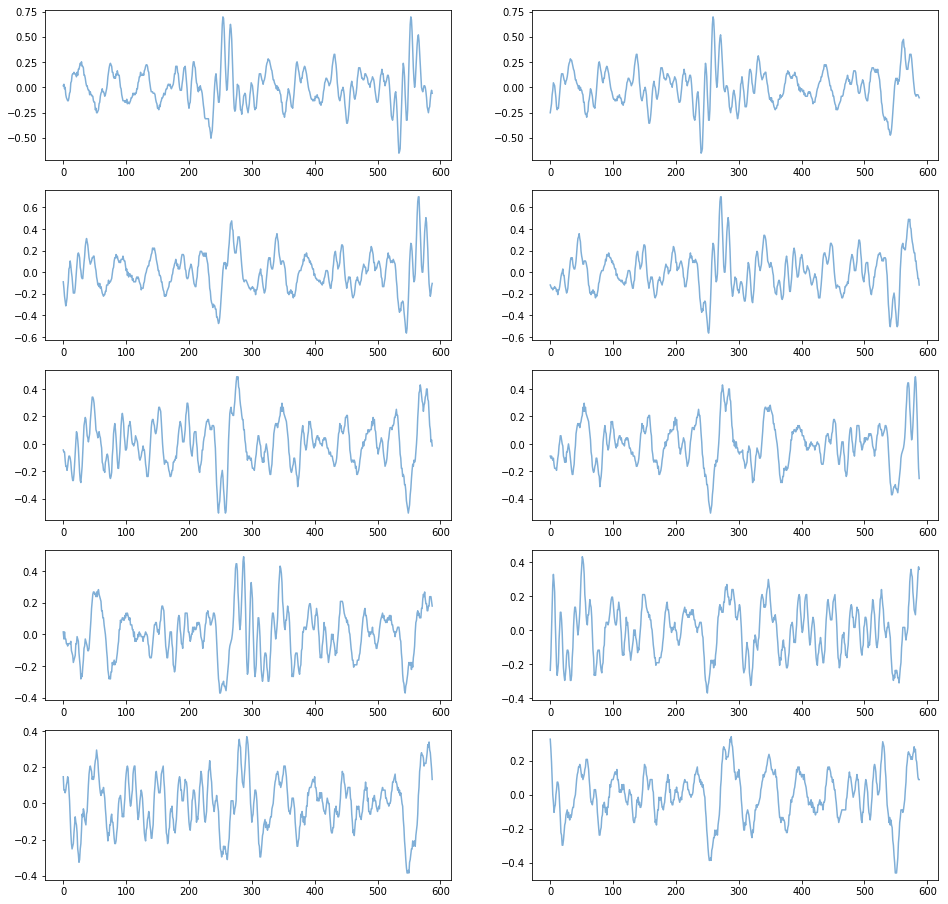

In [59]:
fig = plt.figure(figsize=(16, 16))
detSig = 0
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    sig = yDif2[i*wavShapeLen:(i+2)*wavShapeLen]
    plt.plot(sig, color=(3/255, 96/255, 176/255), alpha=0.5)

y length: 200000, wave length: 588, cov length: 8



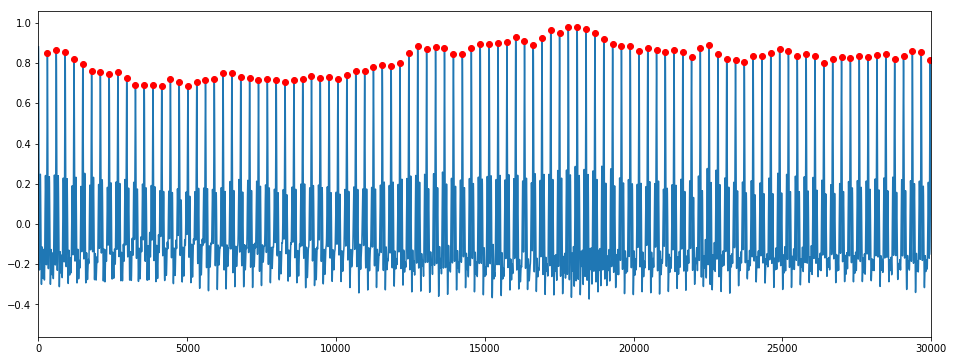

In [55]:
cor_y = np.correlate(y, detSig, mode='full')
cor_y = cor_y[len(detSig)-1:] 
plt.figure(figsize=(16, 6))
plt.plot(cor_y)
print('y length: {}, wave length: {}, cov length: {}\n'.format(len(y), len(detSig), len(x)))
x_, _ = find_peaks(cor_y, distance=wavShapeLen/4, height=0.3)
# x_ = x_[x_ < wavShapeLen * 20]
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([0, 30000])
plt.show()

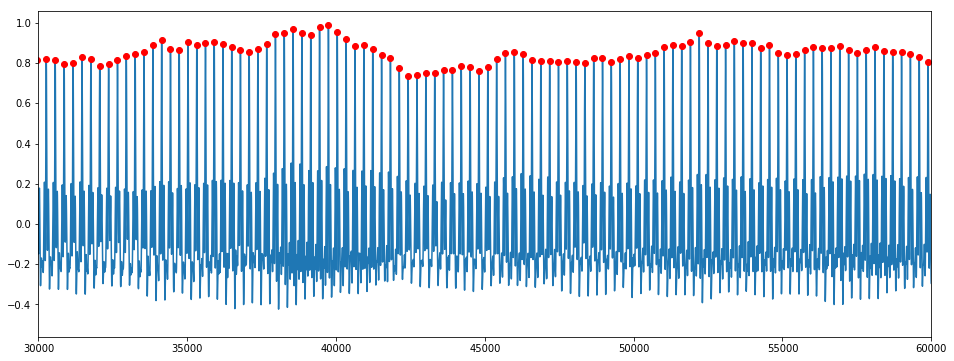

In [167]:
plt.figure(figsize=(16, 6))
plt.plot(cor_y)
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([30000, 60000])
plt.show()

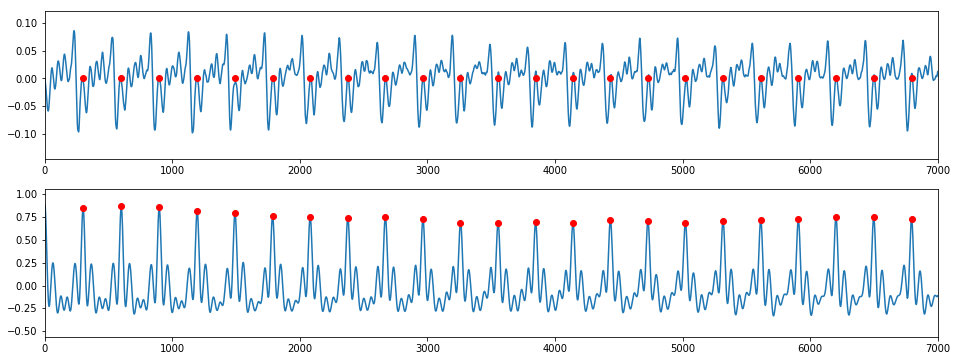

In [168]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.plot(x_, np.zeros([len(x_), 1]), 'ro')
plt.xlim([0, 7000])

plt.subplot(2, 1, 2)
plt.plot(cor_y)
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([0, 7000])
plt.show()

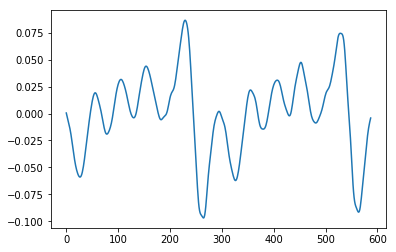

In [169]:
plt.figure()
plt.plot(detSig)
plt.show()

The Number of wave: 666


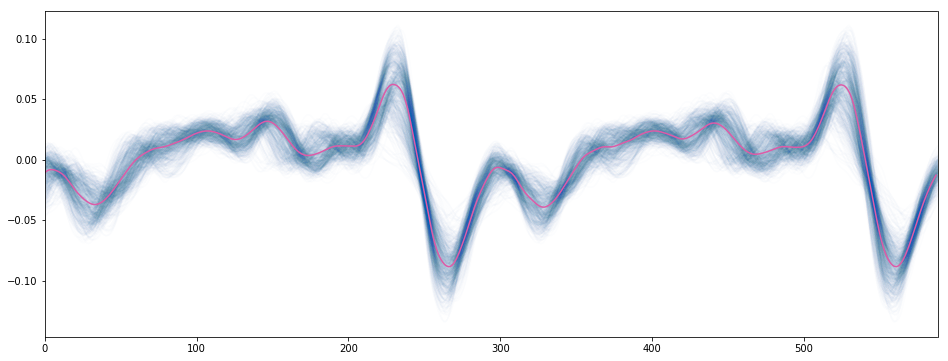

In [170]:
plt.figure(figsize=(16, 6))

meanDetSig = detSig / len(x_)

for i in range(0, len(x_) - 2):
    plt.plot(y[x_[i]:x_[i+2]], color=(3/255, 96/255, 176/255, 0.01))
    meanDetSig = meanDetSig + y[x_[i]:x_[i] + len(meanDetSig)]/len(x_)
    
plt.plot(meanDetSig, color=(222/255, 91/255, 167/255))
    
print('The Number of wave: {}'.format(len(x_)))
plt.xlim([0, len(detSig)])
plt.show()

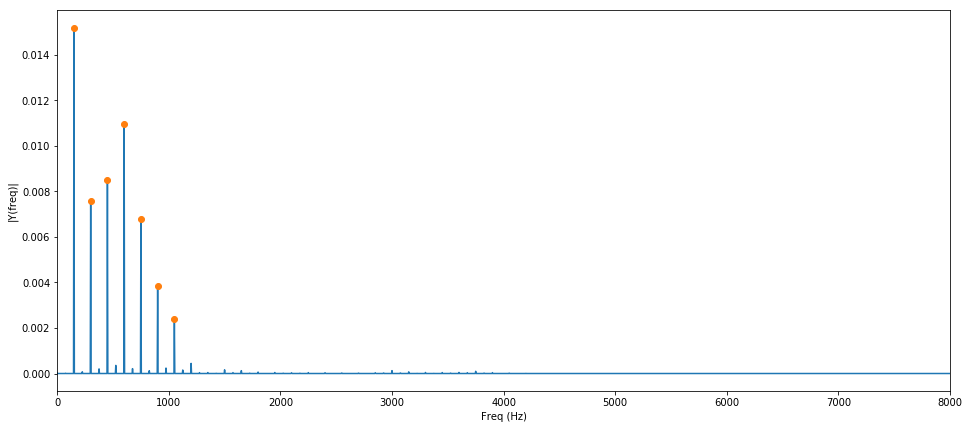

In [171]:
dt = 1.0/fs

dupSig = np.tile(meanDetSig, 20)

time = np.arange(0, len(dupSig)/fs, dt)

n = len(dupSig) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]
Y = np.fft.fft(dupSig)
Y_ = Y[range(np.int(n/2))]/n

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y_)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 8000])

x, _ = find_peaks(abs(Y_), height=0.002)
plt.plot(freq[x], abs(Y_)[x], 'o')
plt.show()

In [ ]:
x

40


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


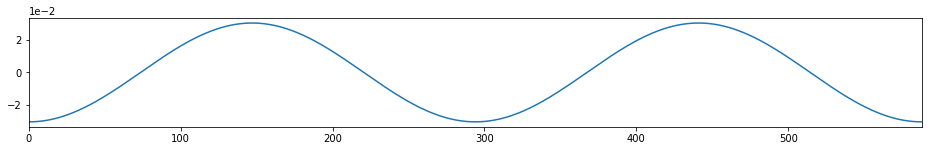

60


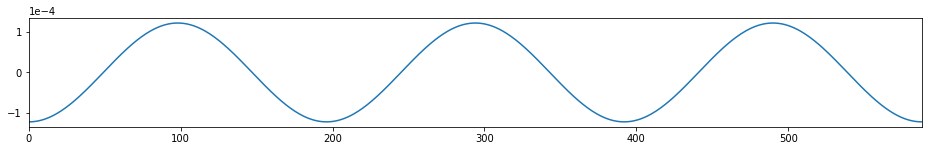

80


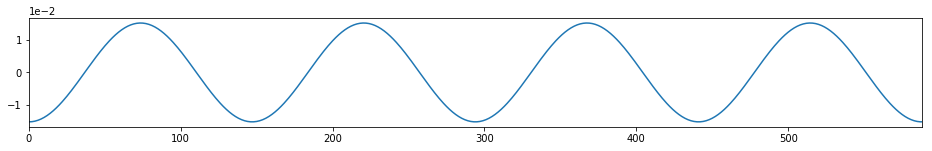

100


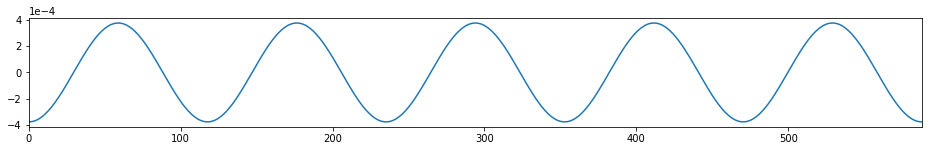

120


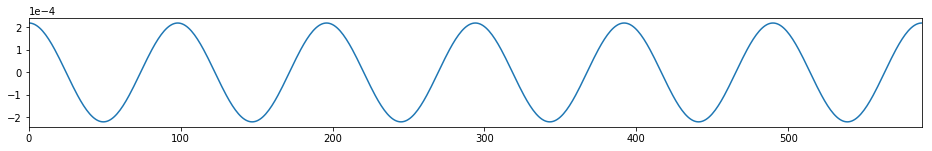

140


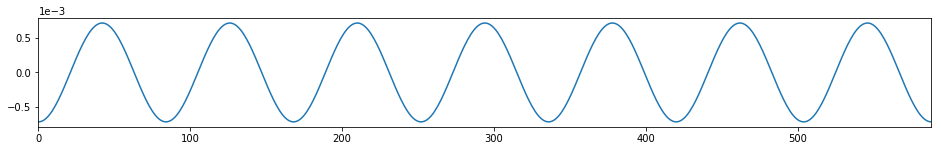

160


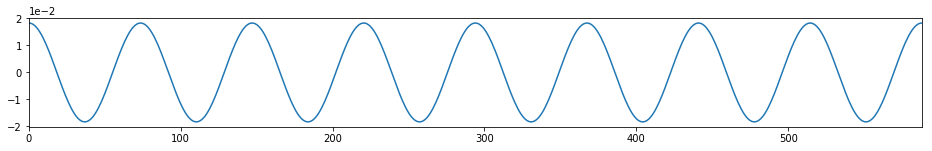

180


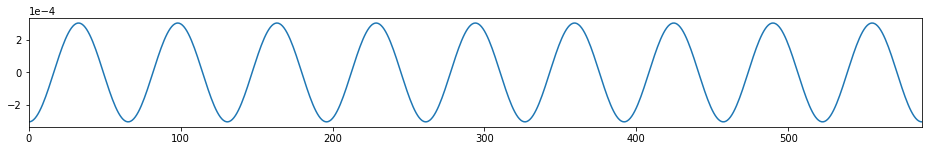

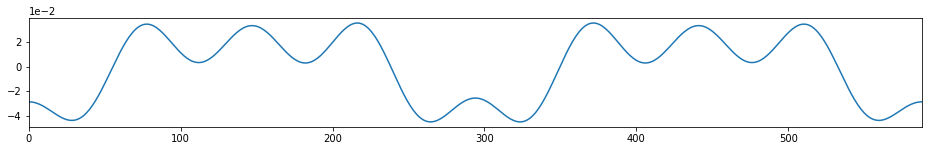

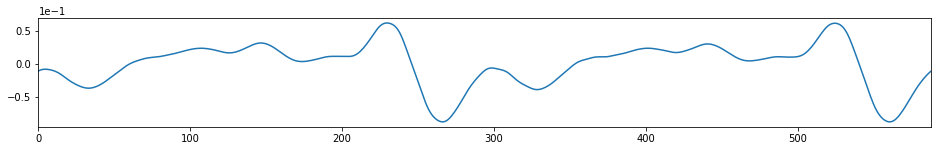

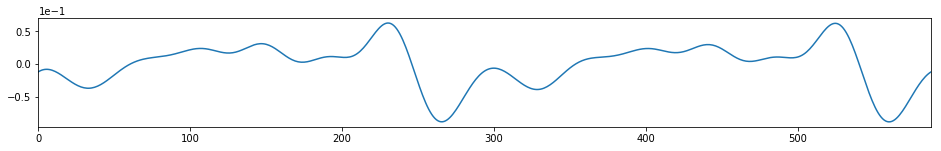

In [181]:
dum = np.zeros(len(dupSig))
lenDum = len(dum)

# for i in range(0, len(x)):
for i in range(40, 200, 20):
    print(i)
    plt.figure(figsize=(16, 2))
    dummy = np.zeros(Y.shape)
#     startIdx = x[i] - 10
#     lastIdx = x[i] + 10
    
    startIdx = i - 10
    lastIdx = i + 10
    
    dummy[startIdx:lastIdx] = Y[startIdx:lastIdx]
    dummy[lenDum - lastIdx:lenDum - startIdx] = Y[lenDum - lastIdx:lenDum - startIdx]
    invSig = ifft(dummy)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
    plt.plot(invSig)
    plt.xlim([0, len(detSig)])
    dum = dum + invSig
    plt.show()
    
plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
plt.plot(dum)
plt.xlim([0, len(detSig)])
plt.show()

plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
plt.plot(dupSig)
plt.xlim([0, len(detSig)])
plt.show()

plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
Y__ = np.asarray(Y)
Y__[400:-400] = 0
plt.plot(ifft(Y__))
plt.xlim([0, len(detSig)])
plt.show()

In [ ]:
plt.plot(abs(Y))
plt.xlim([0, 400])
plt.show()

In [ ]:
plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
Z = np.array(Y, copy=True)
Z[200:-200] = 0
plt.plot(ifft(Z))
plt.xlim([0, len(detSig)])
plt.show()

plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
Z = np.array(Y, copy=True)
Z[200:-200] = 0
plt.plot(ifft(Z))
plt.xlim([0, len(detSig)])
plt.show()

In [ ]:
dupSig_ = np.tile(meanDetSig, 100)
ipd.Audio(dupSig_, rate=fs) # load a NumPy array

In [ ]:
from scipy.signal import butter, lfilter
from scipy.signal import freqs

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y